In [2]:
import requests
import json 
import pandas as pd
import pymongo
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Calling api and converting the data into readable form

url = f'https://archive-api.open-meteo.com/v1/archive?latitude=16.0678&longitude=108.2208&start_date=1993-09-30&end_date=2023-09-30&daily=weathercode,temperature_2m_mean,precipitation_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,et0_fao_evapotranspiration&timezone=auto'
response = requests.get(url)
data = json.loads(response.text)

In [4]:
# Use json_normalize to turn data into pandas dataframe

df = pd.json_normalize(data)

# Use pandas methods to transform the dataframe

df = df.apply(pd.Series.explode)
df = df.reset_index(drop = True)
df.head()

,latitude,longitude,generationtime_ms,utc_offset_seconds,timezone,timezone_abbreviation,elevation,daily_units.time,daily_units.weathercode,daily_units.temperature_2m_mean,...,daily_units.windgusts_10m_max,daily_units.et0_fao_evapotranspiration,daily.time,daily.weathercode,daily.temperature_2m_mean,daily.precipitation_sum,daily.precipitation_hours,daily.windspeed_10m_max,daily.windgusts_10m_max,daily.et0_fao_evapotranspiration
0,16.0,108.20001,130.25105,25200,Asia/Ho_Chi_Minh,+07,11.0,iso8601,wmo code,°C,...,km/h,mm,1993-09-30,53,27.1,2.5,8.0,11.6,24.5,4.13
1,16.0,108.20001,130.25105,25200,Asia/Ho_Chi_Minh,+07,11.0,iso8601,wmo code,°C,...,km/h,mm,1993-10-01,61,26.1,6.3,20.0,11.6,26.6,3.77
2,16.0,108.20001,130.25105,25200,Asia/Ho_Chi_Minh,+07,11.0,iso8601,wmo code,°C,...,km/h,mm,1993-10-02,63,24.9,34.6,22.0,18.8,34.6,1.98
3,16.0,108.20001,130.25105,25200,Asia/Ho_Chi_Minh,+07,11.0,iso8601,wmo code,°C,...,km/h,mm,1993-10-03,63,25.1,41.7,24.0,25.7,46.8,1.41
4,16.0,108.20001,130.25105,25200,Asia/Ho_Chi_Minh,+07,11.0,iso8601,wmo code,°C,...,km/h,mm,1993-10-04,61,25.3,19.3,20.0,22.0,38.9,2.76


In [5]:
# Modify columns name

df.columns = df.columns.str.replace('daily.', 'data-')
df.columns = df.columns.str.replace('daily_units.', 'unit-')
df.head()

,latitude,longitude,generationtime_ms,utc_offset_seconds,timezone,timezone_abbreviation,elevation,unit-time,unit-weathercode,unit-temperature_2m_mean,...,unit-windgusts_10m_max,unit-et0_fao_evapotranspiration,data-time,data-weathercode,data-temperature_2m_mean,data-precipitation_sum,data-precipitation_hours,data-windspeed_10m_max,data-windgusts_10m_max,data-et0_fao_evapotranspiration
0,16.0,108.20001,130.25105,25200,Asia/Ho_Chi_Minh,+07,11.0,iso8601,wmo code,°C,...,km/h,mm,1993-09-30,53,27.1,2.5,8.0,11.6,24.5,4.13
1,16.0,108.20001,130.25105,25200,Asia/Ho_Chi_Minh,+07,11.0,iso8601,wmo code,°C,...,km/h,mm,1993-10-01,61,26.1,6.3,20.0,11.6,26.6,3.77
2,16.0,108.20001,130.25105,25200,Asia/Ho_Chi_Minh,+07,11.0,iso8601,wmo code,°C,...,km/h,mm,1993-10-02,63,24.9,34.6,22.0,18.8,34.6,1.98
3,16.0,108.20001,130.25105,25200,Asia/Ho_Chi_Minh,+07,11.0,iso8601,wmo code,°C,...,km/h,mm,1993-10-03,63,25.1,41.7,24.0,25.7,46.8,1.41
4,16.0,108.20001,130.25105,25200,Asia/Ho_Chi_Minh,+07,11.0,iso8601,wmo code,°C,...,km/h,mm,1993-10-04,61,25.3,19.3,20.0,22.0,38.9,2.76


In [6]:
df.columns

Index(['latitude', 'longitude', 'generationtime_ms', 'utc_offset_seconds',
       'timezone', 'timezone_abbreviation', 'elevation', 'unit-time',
       'unit-weathercode', 'unit-temperature_2m_mean',
       'unit-precipitation_sum', 'unit-precipitation_hours',
       'unit-windspeed_10m_max', 'unit-windgusts_10m_max',
       'unit-et0_fao_evapotranspiration', 'data-time', 'data-weathercode',
       'data-temperature_2m_mean', 'data-precipitation_sum',
       'data-precipitation_hours', 'data-windspeed_10m_max',
       'data-windgusts_10m_max', 'data-et0_fao_evapotranspiration'],
      dtype='object')

In [7]:
# If want to save to MongoDB database then change this value into True

installedMongo = False
if installedMongo:
    # Connect to localhost database
    client = pymongo.MongoClient("mongodb://localhost:27017")
    db = client['weather']
    collection = db['weather-daily']
    
    # Convert dataframe
    insertData = df.to_dict(orient="records")   
    
    # Insert into MongoDB collection
    inserted_ids = collection.insert_many(insertData).inserted_ids

    client.close()
else:
    if not os.path.isdir('../data'):
        os.makedirs('../data')

    df.to_csv('../data/dailyWeather.csv', index=False)

In [39]:
df['data-time'] = pd.to_datetime(df['data-time'])


df['thang'] = df['data-time'].dt.to_period('M')
df['year']=df['data-time'].dt.year
monthly_temp = df.groupby(['month'])['data-temperature_2m_mean'].mean()

yearly_temp=df.groupby(['year'])['data-temperature_2m_mean'].mean()

print(yearly_temp)

year
1993    23.298925
1994    25.896164
1995    25.523562
1996    25.381694
1997    25.834247
1998    26.587397
1999    25.569589
2000    25.335246
2001     25.76411
2002    25.863836
2003    25.806027
2004    25.406831
2005    25.733973
2006    25.811233
2007    25.590411
2008     25.24235
2009    25.741644
2010    26.177534
2011    24.948767
2012    26.071585
2013    25.717808
2014    25.781918
2015    26.222192
2016    26.252459
2017    25.846575
2018    25.865205
2019     26.83726
2020    26.256011
2021     26.08411
2022    25.653973
2023     26.91685
Name: data-temperature_2m_mean, dtype: object


In [48]:
df['data-time'] = pd.to_datetime(df['data-time'])


df['thang'] = df['data-time'].dt.to_period('M')
df['nam']=df['data-time'].dt.year

monthly_rainfall = df.groupby(['month'])['data-precipitation_sum'].sum()

yearly_rainfall=df.groupby(['year'])['data-precipitation_sum'].sum()/12

print(yearly_rainfall)

year
1993         101.5
1994    145.516667
1995    197.191667
1996    206.691667
1997    183.708333
1998    214.541667
1999        256.95
2000    289.366667
2001         179.7
2002    175.508333
2003    179.983333
2004       158.225
2005    198.741667
2006    171.916667
2007    238.291667
2008    254.266667
2009    231.183333
2010        210.25
2011    250.433333
2012    150.558333
2013    210.158333
2014    167.158333
2015    175.433333
2016         237.2
2017    275.308333
2018    161.108333
2019    139.808333
2020         248.9
2021    238.608333
2022    232.341667
2023     95.016667
Name: data-precipitation_sum, dtype: object


In [47]:
df['data-time'] = pd.to_datetime(df['data-time'])


df['thang'] = df['data-time'].dt.to_period('M')
df['nam']=df['data-time'].dt.year

monthly_eva = df.groupby(['month'])['data-et0_fao_evapotranspiration'].sum()

yearly_eva=df.groupby(['year'])['data-et0_fao_evapotranspiration'].sum()/12

print(yearly_eva)

year
1993     18.060833
1994      109.5675
1995      110.1275
1996    106.796667
1997       112.565
1998    115.338333
1999    105.199167
2000    103.843333
2001      108.2825
2002    109.366667
2003    111.658333
2004    110.996667
2005      108.1275
2006    111.605833
2007    104.778333
2008    102.235833
2009    106.228333
2010    109.648333
2011         96.67
2012    107.351667
2013    104.711667
2014    109.441667
2015    113.828333
2016    109.184167
2017    103.413333
2018      106.2025
2019    119.775833
2020    113.120833
2021       112.985
2022    104.716667
2023     91.584167
Name: data-et0_fao_evapotranspiration, dtype: object


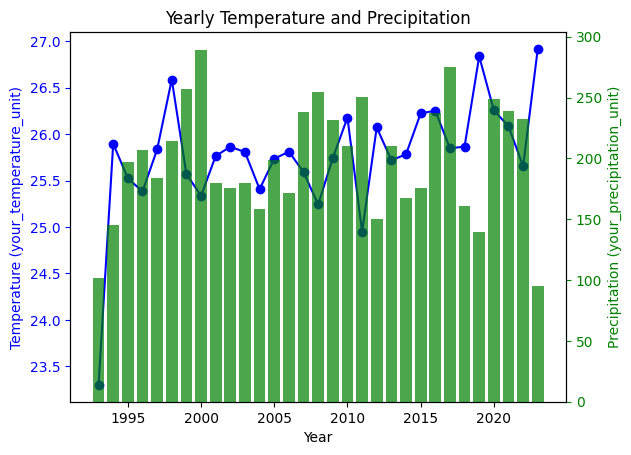

In [53]:
fig, ax1 = plt.subplots()

ax1.plot(yearly_temp.index, yearly_temp, color='b', marker='o', label='Yearly Temperature')
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature (your_temperature_unit)', color='b')
ax1.tick_params('y', colors='b')


ax2 = ax1.twinx()
ax2.bar(yearly_rainfall.index, yearly_rainfall, alpha=0.7, color='g', label='Yearly Precipitation')
ax2.set_ylabel('Precipitation (your_precipitation_unit)', color='g')
ax2.tick_params('y', colors='g')


plt.title('Yearly Temperature and Precipitation')
plt.show()